# Cleaning

**We have cleaned the following in the given dataset subscription.csv :**
- Invalid dates
- Dropping duplicates
- Null or missing values
- Check for 0 or negative price values
- Remove dates in the future

**We have done the following for improved readability :**
- Rename Clients
- Rename ContactIds

In [18]:
# Imports
import pandas as pd

# ImpexiumInsights is the membership data
df = pd.read_csv('subscription.csv')
df['Client'] = df['Client'].replace('Client_3', 'NAIOP')

# Change clients to a more readable format as the following:
# Client_3 -> NAIOP
df.head(10)

,ContactId,ClientId,Client,ProductId,ProductType,EffectiveDate,ExpireDate,Total
0,0xD474CF42D6FEECADAC5AE0E44C19976B,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x3D5A19AE11AFFDB22AD9FFDD548D2E9F,Subscription,6/23/21,12/22/21,518.40
1,0xFB44C5545DC4AE04868E12D73D862634,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x3D5A19AE11AFFDB22AD9FFDD548D2E9F,Subscription,6/23/21,12/22/21,376.65
2,0xF495D2F04206745FD3BEDF273E2F4B56,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x5DC2BF4201BAA480B8B9E34BD2E8CC2E,Subscription,3/10/21,9/9/21,149.85
3,0x8216681574001C438CC9FF22BC43C873,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x3D86FFF3CCD71A7D8C33069E4FF64A97,Subscription,3/12/21,9/11/21,185.49
4,0xC7F1B0DF76E21A15DC9506D31F3B7170,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x5DC2BF4201BAA480B8B9E34BD2E8CC2E,Subscription,2/28/21,8/27/21,109.35
5,0x36913F1B51F4F312B2C10FBC4334BC69,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x3D86FFF3CCD71A7D8C33069E4FF64A97,Subscription,2/4/21,8/3/21,206.55
6,0xAAE00CF86BA9E1E636ABC433BB02F32A,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x3D86FFF3CCD71A7D8C33069E4FF64A97,Subscription,10/2/20,4/1/21,206.55
7,0x215DA9F808D832EA1E0347464F3AF768,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0xC26C28C3E5CE081CD77B28FAD9884A8C,Subscription,12/4/20,6/3/21,265.68
8,0xF06E88279C9F90257664CB0C7BF1A284,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0xC26C28C3E5CE081CD77B28FAD9884A8C,Subscription,2/18/21,8/17/21,295.65
9,0xB2E83B0725AB3C956888FD4091CDB608,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0xC26C28C3E5CE081CD77B28FAD9884A8C,Subscription,6/18/21,12/17/21,265.68


In [19]:
# Removing all entries where EffectiveDate > ExpireDate
df['EffectiveDate'] = pd.to_datetime(df['EffectiveDate'], format='%m/%d/%y')
df['ExpireDate'] = pd.to_datetime(df['ExpireDate'], format='%m/%d/%y')
valid_df = df[df['EffectiveDate'] <= df['ExpireDate']]

# Check 
invalid_df = valid_df[valid_df['EffectiveDate'] > valid_df['ExpireDate']]
print("Are there any entries in the new data frame that are invalid for dates?", not(invalid_df.to_xarray))


# Check passed so modify data frame
df = valid_df

Are there any entries in the new data frame that are invalid for dates? False


In [20]:
# Are there any prices that are 0 or negative?
invalid_rows = df[df['Total'] <= 0]

# Check
print("Are there any prices that are 0 or negative?", not(invalid_rows.to_xarray))

Are there any prices that are 0 or negative? False


In [21]:
# Dropping all duplicates that have the same ContactId, ProductId, EffectiveDate, and ExpireDate
df['EffectiveDate'] = pd.to_datetime(df['EffectiveDate'], format='%m/%d/%y')
df['ExpireDate'] = pd.to_datetime(df['ExpireDate'], format='%m/%d/%y')
df_unique = df.drop_duplicates(subset=['ContactId', 'ProductId', 'EffectiveDate', 'ExpireDate'])

# Check 
duplicates_check = df_unique.duplicated(subset=['ContactId', 'ProductId', 'EffectiveDate', 'ExpireDate'], keep=False)
no_duplicates = not duplicates_check.any()
print("There are no duplicates in the new data frame, based on the specified columns above?", no_duplicates)

# Check passed so modify data frame
df = df_unique

There are no duplicates in the new data frame, based on the specified columns above? True


In [22]:
# Identifying any null or missing values
missing_entries = df[df.isnull().any(axis=1) | df.applymap(lambda x: x == '').any(axis=1)]

# Check
print("Are there any null or missing values in the data frame?", not(missing_entries.to_xarray))

Are there any null or missing values in the data frame? False


In [23]:
# Cleaning: removing all dates in the future.

# Cutoff date is May 2024
cutoff_date = pd.Timestamp('2024-05-01')
df_filtered = df[(df['EffectiveDate'] < cutoff_date) & (df['ExpireDate'] < cutoff_date)]
eff_check = df_filtered['EffectiveDate'].max()
exp_check = df_filtered['ExpireDate'].max()
print("Checks:")
print(eff_check < cutoff_date)
print(exp_check < cutoff_date)

# Check passed so modify data frame
df = df_filtered

Checks:
True
True


In [24]:
# Generate a unique "Member X" identifier for each unique ContactId
temp_df = df.copy()
unique_ids = temp_df['ContactId'].unique()
member_mapping = {id_: f"Member {i+1}" for i, id_ in enumerate(unique_ids)}
temp_df['ContactId'] = temp_df['ContactId'].map(member_mapping)

# Check
print(temp_df.head(5))

# Check passed so modify data frame
df = temp_df

  ContactId                            ClientId Client  \
0  Member 1  0x69CB4E2FB587F20F7AF21D60E989ADAB  NAIOP   
1  Member 2  0x69CB4E2FB587F20F7AF21D60E989ADAB  NAIOP   
2  Member 3  0x69CB4E2FB587F20F7AF21D60E989ADAB  NAIOP   
3  Member 4  0x69CB4E2FB587F20F7AF21D60E989ADAB  NAIOP   
4  Member 5  0x69CB4E2FB587F20F7AF21D60E989ADAB  NAIOP   

                            ProductId   ProductType EffectiveDate ExpireDate  \
0  0x3D5A19AE11AFFDB22AD9FFDD548D2E9F  Subscription    2021-06-23 2021-12-22   
1  0x3D5A19AE11AFFDB22AD9FFDD548D2E9F  Subscription    2021-06-23 2021-12-22   
2  0x5DC2BF4201BAA480B8B9E34BD2E8CC2E  Subscription    2021-03-10 2021-09-09   
3  0x3D86FFF3CCD71A7D8C33069E4FF64A97  Subscription    2021-03-12 2021-09-11   
4  0x5DC2BF4201BAA480B8B9E34BD2E8CC2E  Subscription    2021-02-28 2021-08-27   

    Total  
0  518.40  
1  376.65  
2  149.85  
3  185.49  
4  109.35  


In [25]:
# Saving updated data frame to the csv
# Always run this at the end of your work session:
df.to_csv('modified_subscription.csv', index=False)

In [26]:
df_sub = df.copy(deep=True)
df_mem = (pd.read_csv('modified_membership.csv')).copy(deep=True)
df_sub.head()

,ContactId,ClientId,Client,ProductId,ProductType,EffectiveDate,ExpireDate,Total
0,Member 1,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x3D5A19AE11AFFDB22AD9FFDD548D2E9F,Subscription,2021-06-23,2021-12-22,518.40
1,Member 2,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x3D5A19AE11AFFDB22AD9FFDD548D2E9F,Subscription,2021-06-23,2021-12-22,376.65
2,Member 3,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x5DC2BF4201BAA480B8B9E34BD2E8CC2E,Subscription,2021-03-10,2021-09-09,149.85
3,Member 4,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x3D86FFF3CCD71A7D8C33069E4FF64A97,Subscription,2021-03-12,2021-09-11,185.49
4,Member 5,0x69CB4E2FB587F20F7AF21D60E989ADAB,NAIOP,0x5DC2BF4201BAA480B8B9E34BD2E8CC2E,Subscription,2021-02-28,2021-08-27,109.35


In [27]:
df_mem.head()

,ContactId,ClientId,Client,ProductId,ProductType,EffectiveDate,ExpireDate,Total
0,Member 1,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,2021-09-01,2022-08-31,104.49
1,Member 2,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,2021-08-01,2022-07-31,104.49
2,Member 3,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0xCF82E756F655A4E1518567DCDB80CCBF,Membership,2021-06-27,2022-06-26,36.45
3,Member 3,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,2021-06-19,2022-06-18,104.49
4,Member 4,0xCAB892266CB7872B20CED441410BFF5E,SIOR,0x9E8B160226C9FE22A910C782CE5076E2,Membership,2021-06-27,2022-06-26,104.49


In [42]:
# Finding the proportions of memberships and subscriptions for Client 3 only

mems = set(df_mem['ContactId'].unique())
subs = set(df_sub['ContactId'].unique())
both = mems.intersection(subs)
only_mem = mems - subs
only_sub = subs - mems
print("Number of people with at least one membership and one subscription:", len(both))
print("Number of people with only memberships:", len(only_mem))
print("Number of people with only subscriptions:", len(only_sub))

Number of people with at least one membership and one subscription: 5570
Number of people with only memberships: 87259
Number of people with only subscriptions: 0


In [50]:
# # Based on the provided code snippet, we will calculate the renewal rate for each product for client "NAIOP".

# # First, define the check_membership function as it's referenced in calculate_renewal_rate function.
# def check_membership(group):
#     group['Renewed'] = group['EffectiveDate'].shift(-1) > group['ExpireDate']
#     return group

# # Now define the function to calculate renewal rate per product for the client "NAIOP".
# def calculate_product_renewal_rate(client_df):
#     renewal_rates = {}
#     for product, product_group in client_df.groupby('ProductId'):
#         # Sort by ContactId and EffectiveDate within the product group
#         sorted_group = product_group.sort_values(by=['ContactId', 'EffectiveDate', 'ExpireDate'])
#         sorted_group['EffectiveDate'] = pd.to_datetime(sorted_group['EffectiveDate'])
#         sorted_group['ExpireDate'] = pd.to_datetime(sorted_group['ExpireDate'])
        
#         # Apply the check_membership function
#         renewals = sorted_group.groupby('ContactId', group_keys=False).apply(check_membership)
#         renewed_count = renewals['Renewed'].sum()  # Count of renewals for the product
#         total_count = product_group['ContactId'].nunique()  # Count of unique ContactIds for the product
        
#         # Calculate the renewal rate for the product
#         renewal_rate = renewed_count / total_count if total_count else 0
#         renewal_rates[product] = renewal_rate * 100  # Convert to percentage
#     return renewal_rates

# # Filter the dataframe for client "NAIOP" and calculate the renewal rate per product.
# naiop_df = df_sub[df_sub['Client'] == 'NAIOP']
# naiop_product_renewal_rates = calculate_product_renewal_rate(naiop_df)

# # Output the renewal rates per product for client "NAIOP".
# naiop_product_renewal_rates

In [45]:
# The total revenue of Client 3, NAIOP

client_totals = df.groupby('Client')['Total'].sum()
print(client_totals)

Client
NAIOP    7.458534e+06
Name: Total, dtype: float64


In [46]:
# Finding the most profitable products? And compare the result to top products by entries.
# If the top 10 most profitable products has multiple clients, then those clients are listed.

product_by_totals = df.groupby('ProductId')['Total'].sum()
product_by_clients = df.groupby('ProductId')['Client'].unique().apply(', '.join)
product_by_count = df.groupby('ProductId').size()

# Combining products for clients
combined_df = pd.DataFrame({
    'TotalValue': product_by_totals,
    'Clients': product_by_clients,
    'EntriesCount': product_by_count
})
sorted_df = combined_df.sort_values(by='TotalValue', ascending=False)
most_profitable = sorted_df.head(10)
print("Top 10 products by total value along with their associated clients:")
print(most_profitable)

# Compare results
entries_df = pd.DataFrame({
    'EntriesCount': product_by_count
}).sort_values(by='EntriesCount', ascending=False)
most_entries = entries_df.head(5)
print("\n")
print("Top 5 products by number of entries:")
print(most_entries)

Top 10 products by total value along with their associated clients:
                                      TotalValue Clients  EntriesCount
ProductId                                                             
0x5062BDB4344FA5E923012263DB5A6448  2.035839e+06   NAIOP          1082
0xCFDC71144400EB58499E856230E8377E  1.924787e+06   NAIOP           992
0x98C03E0D2E65D59C41A2C225551AA295  1.706735e+06   NAIOP           591
0xCD3969DBAFDB27CED0A3F2432FA3A439  1.657625e+05   NAIOP           156
0x3E38FA18D6F9694B044440D3666119F7  1.433498e+05   NAIOP           144
0x695A84EA5F17890F1AFAC36158B3D210  1.116713e+05   NAIOP           107
0x2F5D480599C430C9E2527C66D50609FB  9.539733e+04   NAIOP            56
0x7CA2DA1A6C6654627F7429C992A653B6  7.104915e+04   NAIOP           157
0x5882CCC519B7AB9C962B09BE51A8C4EE  5.453973e+04   NAIOP           104
0x86599100ADCF87917CABCFB33CCAF96F  5.440851e+04   NAIOP           141


Top 5 products by number of entries:
                                    Entri

In [47]:
# Getting the minimum, maximum, median, mean, and standard deviation for the top 5 products.

# Use the previous most_profitable output to filter and find statistics
filter_df = most_profitable.index[:5]
product_stats = df[df['ProductId'].isin(filter_df)]
stats_df = product_stats.groupby('ProductId')['Total'].agg(['min', 'max', 'median', 'mean', 'std'])

# Display data in descending order for Total value
ordered_df = stats_df.reindex(filter_df)
print("Statistics for top 5 products by Total:")
print(ordered_df)

# Finding the statistics for the Total column as a whole
general_stats = df['Total'].agg(['min', 'max', 'median', 'mean', 'std'])

# Displaying results
print("\n")
print("Statistics for the Total column:")
print(general_stats)

Statistics for top 5 products by Total:
                                        min      max   median         mean  \
ProductId                                                                    
0x5062BDB4344FA5E923012263DB5A6448     4.05  2365.20  1858.95  1881.551545   
0xCFDC71144400EB58499E856230E8377E  1505.79  2365.20  1858.95  1940.309478   
0x98C03E0D2E65D59C41A2C225551AA295  1534.95  3600.45  2851.20  2887.876142   
0xCD3969DBAFDB27CED0A3F2432FA3A439   911.25  1255.50  1012.50  1062.579808   
0x3E38FA18D6F9694B044440D3666119F7   810.00  1255.50  1012.50   995.484375   

                                           std  
ProductId                                       
0x5062BDB4344FA5E923012263DB5A6448  212.041058  
0xCFDC71144400EB58499E856230E8377E  208.816814  
0x98C03E0D2E65D59C41A2C225551AA295  321.202215  
0xCD3969DBAFDB27CED0A3F2432FA3A439  124.949778  
0x3E38FA18D6F9694B044440D3666119F7   75.376336  


Statistics for the Total column:
min          0.810000
max       360

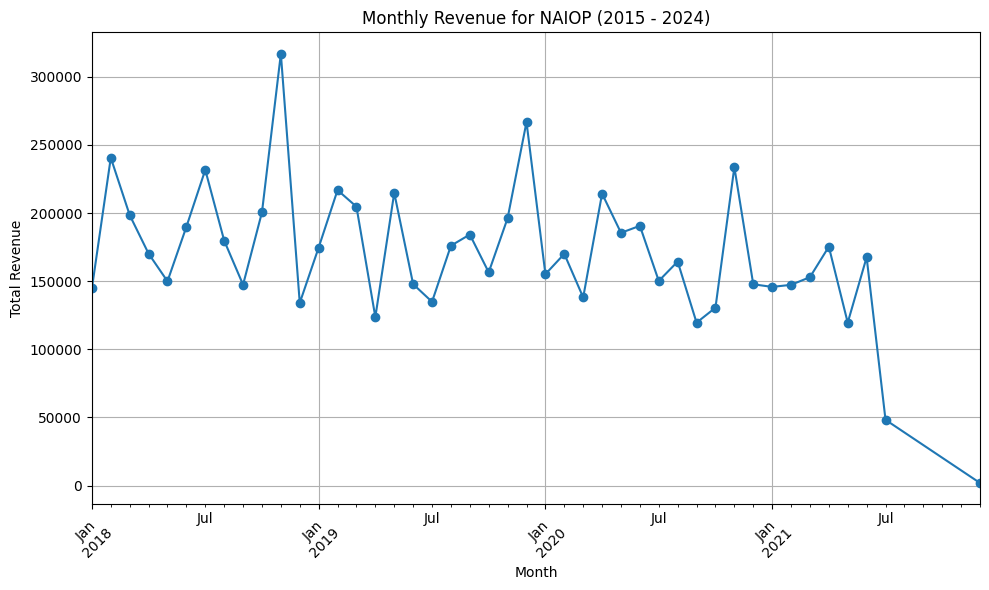

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the necessary columns

# Filtering data by client and date
df_filtered = df[(df['Client'] == 'NAIOP') & (df['EffectiveDate'].dt.year >= 2015)]
df_filtered['Month'] = df_filtered['EffectiveDate'].dt.to_period('M')

# Grouping data by month
revenue_by_month_naiop = df_filtered.groupby(['Month'])['Total'].sum()

# Plotting the data
plt.figure(figsize=(10, 6))
revenue_by_month_naiop.plot(kind='line', marker='o', linestyle='-')

# Setting plot titles and labels
plt.title('Monthly Revenue for NAIOP (2015 - 2024)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/ss/yqcdmh2s71390cvwl12h39300000gn/T/ipykernel_65730/1104240618.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['EffectiveDate'].dt.to_period('M')


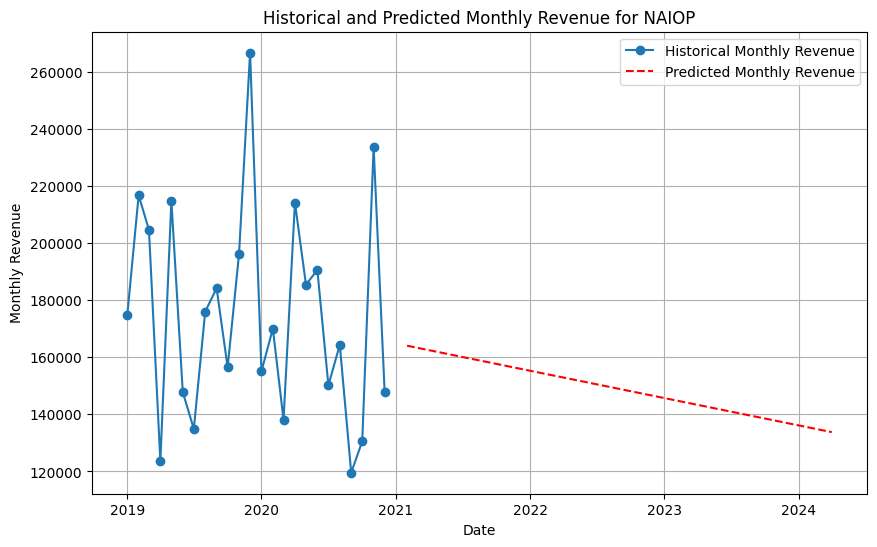

In [57]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

# Assuming 'df_sub' is your DataFrame with the necessary columns for membership data

# Filtering data by client and date
df_filtered = df_sub[(df_sub['Client'] == 'NAIOP') & (df_sub['EffectiveDate'].dt.year >= 2019)]
df_filtered['Month'] = df_filtered['EffectiveDate'].dt.to_period('M')

# Grouping data by month to calculate monthly revenue
revenue_by_month_naiop = df_filtered.groupby(['Month'])['Total'].sum().reset_index()
revenue_by_month_naiop['Month'] = revenue_by_month_naiop['Month'].dt.to_timestamp()

# Fit the linear regression model to data up to mid-2021
training_data = revenue_by_month_naiop[revenue_by_month_naiop['Month'] < pd.Timestamp('2021-01-01')]
X_train = np.array([d.toordinal() for d in training_data['Month']]).reshape(-1, 1)
y_train = training_data['Total'].values

model = LinearRegression()
model.fit(X_train, y_train)

# Generate dates from mid-2021 to the present for predictions
predict_dates = pd.date_range(start='2021-01-01', end=pd.to_datetime("today"), freq='M')
predict_dates_ordinal = np.array([d.toordinal() for d in predict_dates]).reshape(-1, 1)

# Predict the monthly revenue
predicted_sales = model.predict(predict_dates_ordinal)

# Plotting historical data up to mid-2021
plt.figure(figsize=(10, 6))
plt.plot(training_data['Month'], training_data['Total'], label='Historical Monthly Revenue', marker='o')

# Plotting predicted monthly revenue from mid-2021 to present
plt.plot(predict_dates, predicted_sales, label='Predicted Monthly Revenue', linestyle='--', color='red')

# Set the title and labels
plt.title('Historical and Predicted Monthly Revenue for NAIOP')
plt.xlabel('Date')
plt.ylabel('Monthly Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [62]:
# Assuming 'df_mem' is your DataFrame with the necessary columns for membership data

# Filtering data by client and date
df_filtered = df_mem[(df_mem['Client'] == 'NAIOP') & (df_mem['EffectiveDate'].dt.year >= 2019)]
df_filtered['Month'] = df_filtered['EffectiveDate'].dt.to_period('M')

# Grouping data by month to calculate monthly revenue
revenue_by_month_naiop = df_filtered.groupby(['Month'])['Total'].sum().reset_index()
revenue_by_month_naiop['Month'] = revenue_by_month_naiop['Month'].dt.to_timestamp()

# Fit the linear regression model to data up to mid-2021
training_data = revenue_by_month_naiop[revenue_by_month_naiop['Month'] < pd.Timestamp('2021-01-01')]
X_train = np.array([d.toordinal() for d in training_data['Month']]).reshape(-1, 1)
y_train = training_data['Total'].values

model = LinearRegression()
model.fit(X_train, y_train)

# Generate dates from mid-2021 to the present for predictions
predict_dates = pd.date_range(start='2021-01-01', end=pd.to_datetime("today"), freq='M')
predict_dates_ordinal = np.array([d.toordinal() for d in predict_dates]).reshape(-1, 1)

# Predict the monthly revenue
predicted_sales = model.predict(predict_dates_ordinal)

# Plotting historical data up to mid-2021
plt.figure(figsize=(10, 6))
plt.plot(training_data['Month'], training_data['Total'], label='Historical Monthly Revenue', marker='o')

# Plotting predicted monthly revenue from mid-2021 to present
plt.plot(predict_dates, predicted_sales, label='Predicted Monthly Revenue', linestyle='--', color='red')

# Set the title and labels
plt.title('Historical and Predicted Monthly Revenue for NAIOP')
plt.xlabel('Date')
plt.ylabel('Monthly Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Assuming 'df_sub' is your DataFrame with the necessary columns for membership data

# # Filtering data by client and date
# df_filtered = df_sub[(df_sub['Client'] == 'NAIOP') & (df_sub['EffectiveDate'].dt.year >= 2019)]
# df_filtered['Month'] = df_filtered['EffectiveDate'].dt.to_period('M')

# # Grouping data by month to calculate monthly revenue
# revenue_by_month_naiop = df_filtered.groupby(['Month'])['Total'].sum().reset_index()
# revenue_by_month_naiop['Month'] = revenue_by_month_naiop['Month'].dt.to_timestamp()

# # Fit the linear regression model to data up to mid-2021
# training_data = revenue_by_month_naiop[revenue_by_month_naiop['Month'] < pd.Timestamp('2021-01-01')]
# X_train = np.array([d.toordinal() for d in training_data['Month']]).reshape(-1, 1)
# y_train = training_data['Total'].values

# model = LinearRegression()
# model.fit(X_train, y_train)

# # Generate dates from mid-2021 to the present for predictions
# predict_dates = pd.date_range(start='2021-01-01', end=pd.to_datetime("today"), freq='M')
# predict_dates_ordinal = np.array([d.toordinal() for d in predict_dates]).reshape(-1, 1)

# # Predict the monthly revenue
# predicted_sales = model.predict(predict_dates_ordinal)

# # Plotting historical data up to mid-2021
# plt.figure(figsize=(10, 6))
# plt.plot(training_data['Month'], training_data['Total'], label='Historical Monthly Revenue', marker='o')

# # Plotting predicted monthly revenue from mid-2021 to present
# plt.plot(predict_dates, predicted_sales, label='Predicted Monthly Revenue', linestyle='--', color='red')

# # Set the title and labels
# plt.title('Historical and Predicted Monthly Revenue for NAIOP')
# plt.xlabel('Date')
# plt.ylabel('Monthly Revenue')
# plt.legend()
# plt.grid(True)

# # Display the plot
# plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

- do the monthly aggregated revenue graph instead of monthly

- comapre total profits of subscriptions and profits by client or products (most likely client ) to determine if subscriptions are even needed
- Look at the top 5 products by renewal rates too
- Then see if there are overlaps in products between membership and subscription
- are subscriptions annual or more?
- Focus on high paying products


- compare client 3 to itself when making inferences, monthly, annual, seasonal, etc
- ^ its a differnet org to beign with (bc of subscription data)
- make y axis a log scale
- check revenue against renewal
- time series forcasting for green revenue model
- basically 0s because of added noise
- Graph fall offs are maybe because org stopped working, providing data, etc
- worth looking into time series prediction model, can vary what we give the model (for example just give in the pattern part)
- 3 parts of a time series model